In [4]:
# Tsunami Prediction from Earthquake Data
# CAP 4630 Final Project
# Eliya Said, Ian Santiago-Rivera, Nelson Gonzalez, Lena Kovacevic, Tim Perez

In [5]:
import sys
!{sys.executable} -m pip install -q pandas numpy matplotlib seaborn scikit-learn ipykernel


In [6]:
# Load data and required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = pd.read_csv('earthquake_data_tsunami.csv')
data = data[data['Year'] >= 2013].copy()
print(data.head())
print(data.shape)
print("\n")
print(data['tsunami'].value_counts())

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
(418, 13)


tsunami
1    304
0    114
Name: count, dtype: int64


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# Features
X = data.drop(columns=['tsunami'])
y = data['tsunami']


# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy Score: 0.75


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.30      0.40        23
           1       0.78      0.92      0.84        61

    accuracy                           0.75        84
   macro avg       0.68      0.61      0.62        84
weighted avg       0.72      0.75      0.72        84





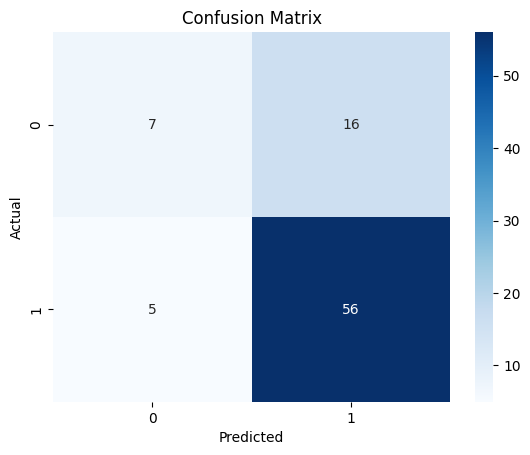

In [9]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print Accuracy Score and Classification Report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\n")

# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [10]:
# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n")

Accuracy Score: 0.8809523809523809


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.88      0.97      0.92        61

    accuracy                           0.88        84
   macro avg       0.88      0.81      0.84        84
weighted avg       0.88      0.88      0.87        84





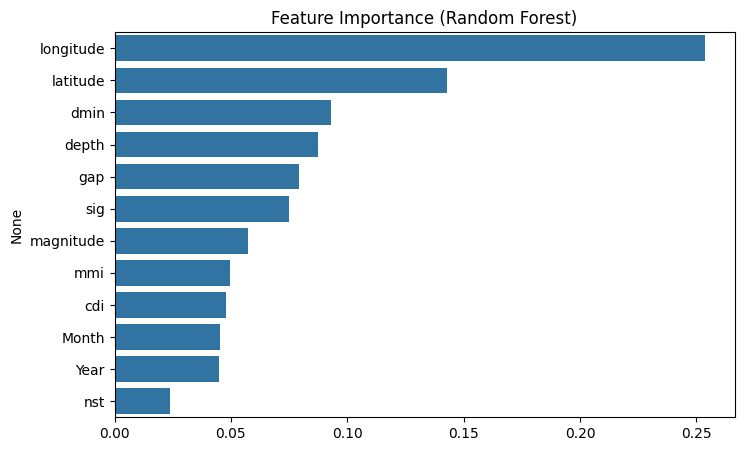

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()


 Model Training on `earthquake_data_tsunami.csv`

The following cells were inserted  to ensure this notebook **trains and evaluates** a baseline model
(Logistic Regression + Random Forest) on the `tsunami` label. If your target has a different name, change `TARGET` below. Code was created with help from Cursor.


In [12]:

# Setup
!pip -q install pandas numpy scikit-learn matplotlib


In [13]:

from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

RAW = Path("earthquake_data_tsunami.csv")   # sits next to the notebook
assert RAW.exists(), f"File not found at {RAW.resolve()}"

TARGET = "tsunami"

df = pd.read_csv(RAW).dropna(how="all")
assert TARGET in df.columns, f"Target column '{TARGET}' not found. Columns: {list(df.columns)}"

y = df[TARGET]
X = df.drop(columns=[TARGET])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val,   X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

X_train.join(y_train.rename(TARGET)).to_csv("earthquake_train.csv", index=False)
X_val.join(y_val.rename(TARGET)).to_csv("earthquake_val.csv", index=False)
X_test.join(y_test.rename(TARGET)).to_csv("earthquake_test.csv", index=False)

print("Wrote splits: earthquake_train.csv, earthquake_val.csv, earthquake_test.csv")



Wrote splits: earthquake_train.csv, earthquake_val.csv, earthquake_test.csv



=== LogReg on VAL ===
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        72
           1       0.77      0.96      0.85        45

    accuracy                           0.87       117
   macro avg       0.87      0.89      0.87       117
weighted avg       0.89      0.87      0.87       117

ROC AUC: 0.9407407407407409

=== RF on VAL ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        72
           1       0.88      0.96      0.91        45

    accuracy                           0.93       117
   macro avg       0.92      0.94      0.93       117
weighted avg       0.93      0.93      0.93       117

ROC AUC: 0.9621913580246914

=== FINAL on TEST (RandomForest) ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        72
           1       0.83      0.93      0.88        46

    accuracy                           0.90   

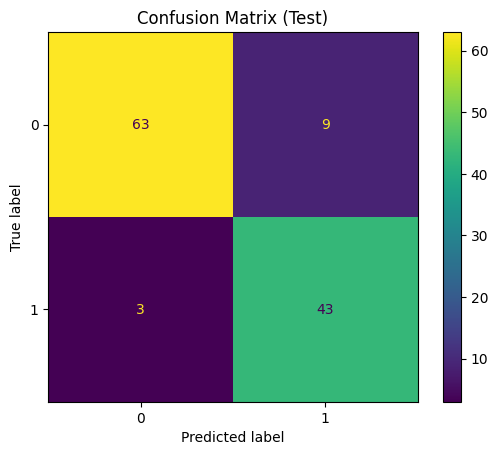

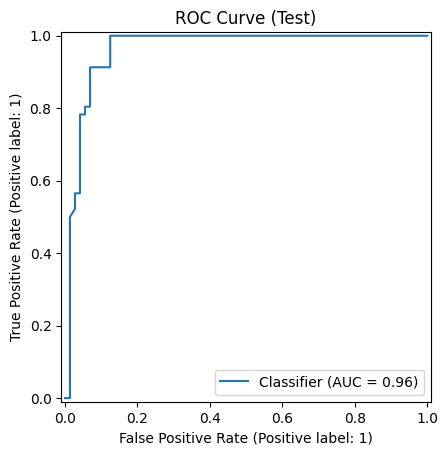

In [14]:

# Train + evaluate baselines
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

TRAIN, VAL, TEST = "earthquake_train.csv", "earthquake_val.csv", "earthquake_test.csv"
TARGET = "tsunami"

def load():
    train = pd.read_csv(TRAIN); val = pd.read_csv(VAL); test = pd.read_csv(TEST)
    return train, val, test

def split_xy(df):
    return df.drop(columns=[TARGET]), df[TARGET]

train, val, test = load()
X_train, y_train = split_xy(train)
X_val, y_val = split_xy(val)
X_test, y_test = split_xy(test)

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

pre = ColumnTransformer([
    ("num", StandardScaler(with_mean=False), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

logit = Pipeline([("pre", pre), ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))])
rf    = Pipeline([("pre", pre), ("clf", RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"))])

results = {}
for name, model in [("LogReg", logit), ("RF", rf)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    try:
        proba = model.predict_proba(X_val)[:, 1]
    except Exception:
        proba = None

    print(f"\n=== {name} on VAL ===")
    print(classification_report(y_val, preds))
    if proba is not None and len(np.unique(y_val)) == 2:
        auc = roc_auc_score(y_val, proba)
        print("ROC AUC:", auc)
        results[name] = {"auc": float(auc)}
    else:
        results[name] = {}

# Refit RF on train+val and test
X_trval = pd.concat([X_train, X_val], axis=0)
y_trval = pd.concat([y_train, y_val], axis=0)
rf.fit(X_trval, y_trval)
test_preds = rf.predict(X_test)
try:
    test_proba = rf.predict_proba(X_test)[:, 1]
except Exception:
    test_proba = None

print("\n=== FINAL on TEST (RandomForest) ===")
print(classification_report(y_test, test_preds))
if test_proba is not None and len(np.unique(y_test)) == 2:
    print("ROC AUC (test):", roc_auc_score(y_test, test_proba))

# Plots
ConfusionMatrixDisplay.from_predictions(y_test, test_preds)
plt.title("Confusion Matrix (Test)")
plt.show()

if test_proba is not None and len(np.unique(y_test)) == 2:
    RocCurveDisplay.from_predictions(y_test, test_proba)
    plt.title("ROC Curve (Test)")
    plt.show()


Saved metrics_summary.csv


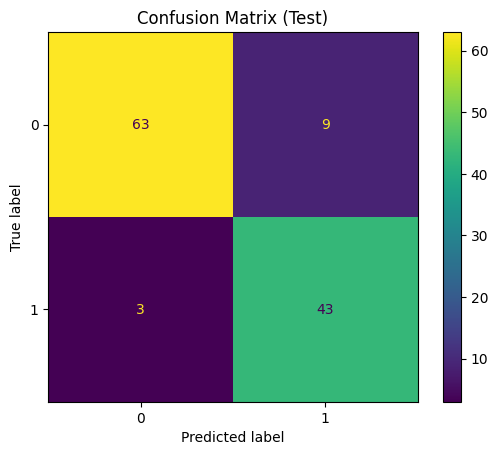

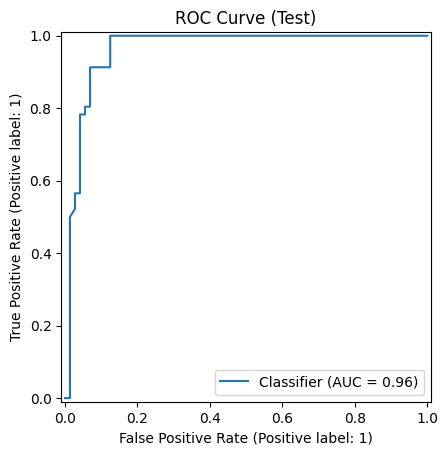

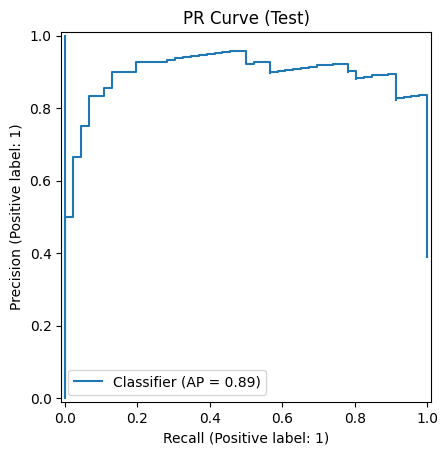

TEST PR AUC: 0.8894
Saved model.pkl


In [15]:
# Save metrics & artifacts
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, accuracy_score, roc_auc_score, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
import joblib

# Ensure necessary predictions
try:
    _ = val_preds
except NameError:
    # If you didn't keep validation preds, recompute with the RF you chose
    val_preds = rf.predict(X_val)
    try:
        val_proba = rf.predict_proba(X_val)[:, 1]
    except Exception:
        val_proba = None

try:
    _ = test_preds
except NameError:
    test_preds = rf.predict(X_test)
try:
    _ = test_proba
except NameError:
    try:
        test_proba = rf.predict_proba(X_test)[:, 1]
    except Exception:
        test_proba = None

# Build compact metrics table
val_rep  = classification_report(y_val,  val_preds,  output_dict=True)
test_rep = classification_report(y_test, test_preds, output_dict=True)

rows = [{
    "split": "val",
    "accuracy": accuracy_score(y_val, val_preds),
    "precision_w": val_rep["weighted avg"]["precision"],
    "recall_w":    val_rep["weighted avg"]["recall"],
    "f1_w":        val_rep["weighted avg"]["f1-score"],
    "roc_auc":     (roc_auc_score(y_val, val_proba) if (val_proba is not None and len(np.unique(y_val))==2) else np.nan),
}]
rows.append({
    "split": "test",
    "accuracy": accuracy_score(y_test, test_preds),
    "precision_w": test_rep["weighted avg"]["precision"],
    "recall_w":    test_rep["weighted avg"]["recall"],
    "f1_w":        test_rep["weighted avg"]["f1-score"],
    "roc_auc":     (roc_auc_score(y_test, test_proba) if (test_proba is not None and len(np.unique(y_test))==2) else np.nan),
})

pd.DataFrame(rows).to_csv("metrics_summary.csv", index=False)
print("Saved metrics_summary.csv")

# Save plots
# Confusion Matrix (TEST)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds)
plt.title("Confusion Matrix (Test)")
plt.savefig("confusion_matrix_test.png", dpi=200, bbox_inches="tight")
plt.show()

# ROC + PR curves (only for binary + if probabilities exist)
if (test_proba is not None) and (len(np.unique(y_test)) == 2):
    RocCurveDisplay.from_predictions(y_test, test_proba)
    plt.title("ROC Curve (Test)")
    plt.savefig("roc_curve_test.png", dpi=200, bbox_inches="tight")
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_test, test_proba)
    plt.title("PR Curve (Test)")
    plt.savefig("pr_curve_test.png", dpi=200, bbox_inches="tight")
    plt.show()

    print("TEST PR AUC:", round(average_precision_score(y_test, test_proba), 4))

# Save the trained model
joblib.dump(rf, "model.pkl")
print("Saved model.pkl")
